# Making Business Decisions Based on Data (A/B Testing)

In this project we will work with the marketing team of an online store to test some hypothesis that can help the store in several ways.

The project has 2 parts:

## [Part 1. Prioritizing Hypotheses.](#Part-1.-Prioritizing-Hypotheses)

In this part we will organize our hypotheses based on priority to decide which one we should start with.
we will use 2 methods `ICE` and `Rice`. we conduct both methods and compare the results.

## [Part 2. A/B Test Analysis.](#Part-2.-A/B-Test-Analysis)

In this part we will analyze the data we got from conducting an A/B Test for one of the hypotheses.  
We will try to follow and answer the following questions:

1. [Graph cumulative revenue by group. Make conclusions and conjectures.](#Cumulative-Revenue-by-Group)
2. [Graph cumulative average order size by group. Make conclusions and conjectures.](#Cumulative-Average-Order-Size-by-Group) 
3. [Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#Relative-Difference-in-Cumulative-Average-Order-Size)
4. [Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#Daily-Conversion-Rates)
5. [Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#Number-of-Orders-per-User)
6. [Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#Percentiles-for-the-Number-of-Orders-per-User)
7. [Plot a scatter chart of order prices. Make conclusions and conjectures.](#Order-Prices)
8. [Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.](#Percentiles-of-Order-Prices)
9. [Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#Statistical-Significance-of-the-Difference-in-Conversion-(Raw-Data))
10. [Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#Statistical-Significance-of-the-Difference-in-Average-Order-Size-(Raw-Data))
11. [Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#Statistical-Significance-of-the-Difference-in-Conversion-(Filtered-Data))
12. [Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#Statistical-Significance-of-the-Difference-in-Average-Order-Size-(Filtered-Data))
13. [Make a decision based on the test results. The possible decisions are:](#Make-a-Decision-Based-on-the-Test-Results)
- Stop the test, consider one of the groups the leader. 
- Stop the test, conclude that there is no difference between the groups. 
- Continue the test.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import datetime as dt
import time

## Part 1. Prioritizing Hypotheses 

In [2]:
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
hypothesis.columns = hypothesis.columns.str.lower()

In [3]:
pd.set_option('max_colwidth', 400)
hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
hypothesis['number'] = hypothesis.index + 1
hypothesis

,hypothesis,reach,impact,confidence,effort,number
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,1
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,4
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,5
5,Add a customer review page. This will increase the number of orders,3,2,2,3,6
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,7
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,8
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,9


### 'ICE' Method

We will calculate ICE Framework using the following formula:

ICE = (Impact * Confidence) / Effort

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['effort'] 

In [6]:
hypothesis[['hypothesis', 'number','ICE']].sort_values(by= 'ICE', ascending = False)

,hypothesis,number,ICE
8,Launch a promotion that gives users discounts on their birthdays,9,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,1,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,8,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,7,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,2.000000
5,Add a customer review page. This will increase the number of orders,6,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,1.125000
4,Change the background color on the main page. This will increase user engagement,5,1.000000


### 'RICE' Method

Now we will calculate RICE Framework using the following formula:

ICE = (Reach * Impact * Confidence) / Effort

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['effort'] 

In [8]:
hypothesis[['hypothesis', 'number', 'RICE']].sort_values(by= 'RICE', ascending = False)

,hypothesis,number,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,8,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,1,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,7,40.0
8,Launch a promotion that gives users discounts on their birthdays,9,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,9.0
1,Launch your own delivery service. This will shorten delivery time,2,4.0
5,Add a customer review page. This will increase the number of orders,6,4.0
4,Change the background color on the main page. This will increase user engagement,5,3.0


Analyzing the Results:

1. **ICE:**  
Using the 'ICE' Method we see that the most promising hypotheses are 9, 1, 8, 7 and 3

2. **RICE:**  
Using the 'RICE' Method we see that the most promising hypotheses are still the same: 9, 1, 8, 7 and 3 but the order has changed quite a bit to be like this 8, 3, 1, 7 then 9.  
We notice:

- even though 'H9' was first in ICE it came 5th in RICE
- 'H8' came first in RICE after it was 3rd in ICE 
- 'H3' came 2nd in Rice after it was 5th in ICE  

This change can be related and explained by the `reach`parameter in the 'RICE' method which affected the results.  
As we can see the reach of the 'H8' was 10 which is the highest as the change propsed by this hypothesis is expected to reach about 50% of the users, (the scale is linear which usually means that 1 point reach equals 5% of the users), so as a reuslt the priority of this hypothesis increased considerably opposed to 'H9' which has only a reach of 1 so the results didn't change.

## Part 2. A/B Test Analysis  

We will start with cleaning the data

In [9]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
visits.duplicated().sum()

0

In [16]:
orders['visitorid'].nunique()

1031

We will check to see if the users are splitted into groups correctly, in other words we will check if there are any users who are counted in both groups, if there is we wil drop thier data and continue our test without it.

In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [18]:
# calculating in how many groups every user is
group_count = orders.groupby('visitorid')['group'].nunique().reset_index()
group_count.head()

,visitorid,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [19]:
group_count['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

In [20]:
# separating the users_id for the users who are in both groups
users_multiple_groups = group_count[group_count['group'] == 2]['visitorid']

In [21]:
# creating new orders dataset for the users who are in 1 group only
orders_clean = orders[np.logical_not(orders['visitorid'].isin(users_multiple_groups))]
orders_clean.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [22]:
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


**Now we will start with our calculations and analysis of the data**

In [23]:
# building an array with unique paired date-group values 

datesGroups = orders_clean[['date','group']].drop_duplicates()

In [24]:
# getting aggregated cumulative daily data on orders 

ordersAggregated = (
    datesGroups.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'],orders_clean['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique,
                 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [25]:
# getting aggregated cumulative daily data on visitors 

visitorsAggregated = (datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                                          visits['group'] == x['group'])]
                                        .agg({'date' : 'max','group' : 'max','visits' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
# merging the two tables into one and giving its columns descriptive names

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [27]:
# DataFrame with cumulative orders and cumulative revenue by day, group A

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [28]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


### Cumulative Revenue by Group

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


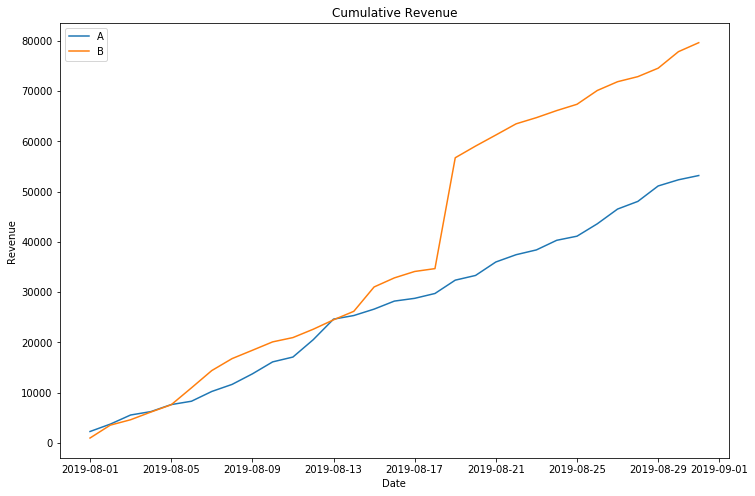

In [29]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.title('Cumulative Revenue');
plt.xlabel('Date');
plt.ylabel('Revenue');
plt.legend();

- Revenue is rising steadily throughout the whole test
- Both groups have small spikes at sometimes
- The most noticable is a huge spike in revenue for group B between 17.08. and 21.08.This may imply either a surge in the number of orders or the presence of very expensive orders in the sample. We will analyze it when we check for the outliers.

### Cumulative Average Order Size by Group

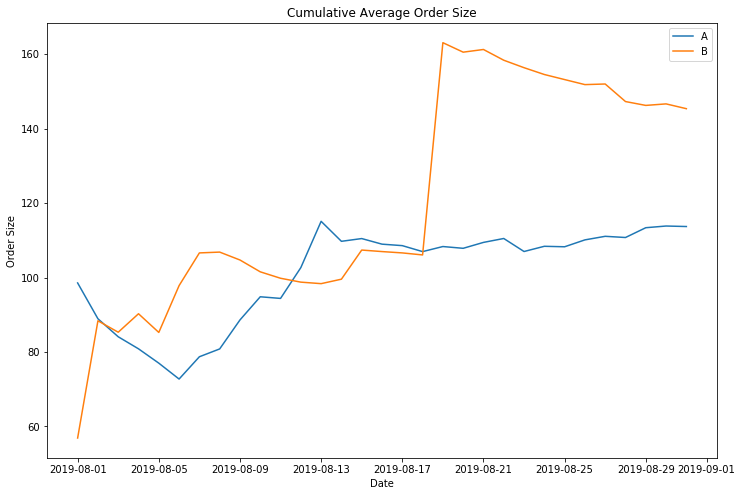

In [30]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.title('Cumulative Average Order Size');
plt.xlabel('Date');
plt.ylabel('Order Size');
plt.legend();

- We can see that the cumultaive average order size is still fluctuating and it is hard to count on these results to make decisions. 
- The groups keep on switching places taking the lead. 
- Both groups have big surges and spike at several times throughout the test and need to check it when we analyze the outliers.
- By the end of the test the average order size becomes sort of steady and stabilizes for group A and keeps on falling for group B after a huge surge.

### Relative Difference in Cumulative Average Order Size

In [31]:
# gathering the data into one DataFrame

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


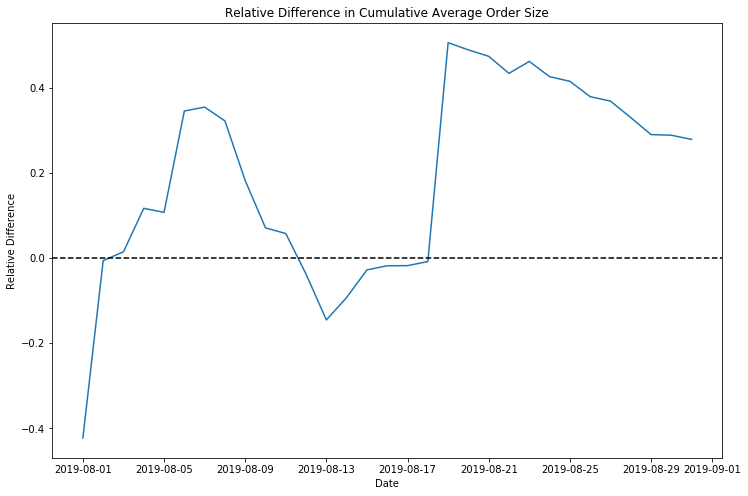

In [32]:
plt.figure(figsize=(12,8));
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);
plt.title('Relative Difference in Cumulative Average Order Size');
plt.xlabel('Date');
plt.ylabel('Relative Difference');
plt.axhline(y=0, color='black', linestyle='--');

- We can see that At several points throughout the test the difference between the groups spikes and changes. This is probably due to big orders and outliers in the data.  
- Due to the outliers and the surges and even though that group B has the lead most of the times but we can't draw any conclusions until we get rid of the outliers and study the clean and consistent data.

### Daily Conversion Rates

In [33]:
# calculating cumulative conversion

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B 

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [34]:
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


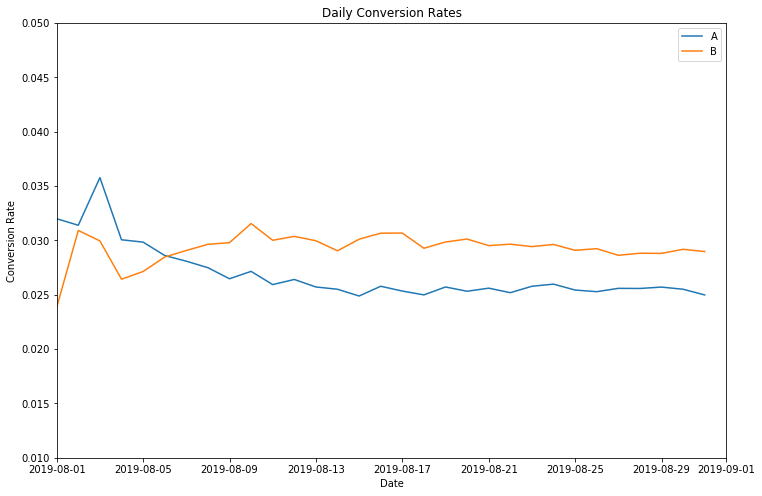

In [35]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.title('Daily Conversion Rates');
plt.xlabel('Date');
plt.ylabel('Conversion Rate');
plt.legend();

# setting the axes' scale
plt.axis(["2019-08-01", '2019-09-01', 0.01, 0.05]);

After some fluctuating in the beginning of the test the conversion rate for group A fell and stabilized around 2.5% while the conversion rate for group B stabilized at a higher value around 3%  

Now lets look a relative difference graph for the cumulative conversion rates

In [36]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], left_on='date',
                                      right_on='date', how='left', suffixes=['A', 'B']))
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


['2019-08-01', '2019-09-01', -0.5, 0.5]

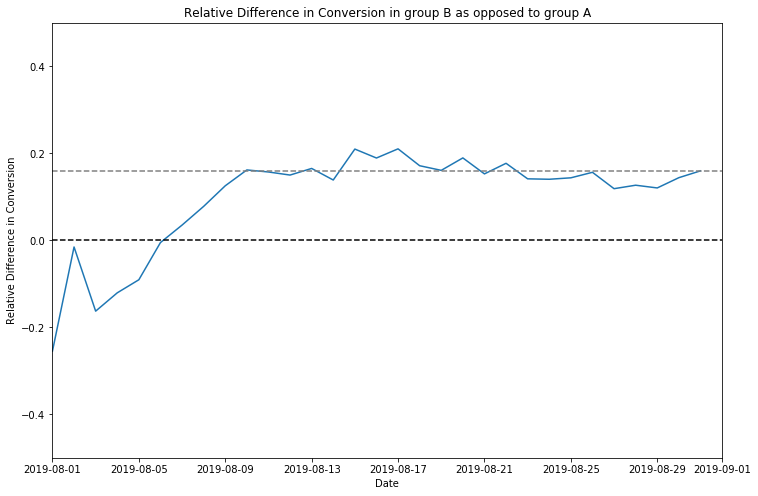

In [37]:
plt.figure(figsize=(12,8));
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Relative Difference in Conversion in group B as opposed to group A');
plt.xlabel('Date');
plt.ylabel('Relative Difference in Conversion');

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

We see that group B was in the lead of Conversion almost from the beginning. It gained steadily and after very small fluctuations it seems to that it stabilized around 16% higher than group A.

Based on what we saw untill now and even though we can't be certain before we analyze the outliers we can say that group B is in the lead for now. 

## Outliers and Surges Analysis

We will start now analyzing the outliers and for this we will study the number of orders per user and the orders' prices and find the limits that define the outliers in the data.

### Number of Orders per User  

In [38]:
orders_clean.head(3)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B


In [39]:
ordersByUsers = (
    orders_clean.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))

ordersByUsers.columns = ['visitorid', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


we see that there isn't much difference in the number of orders for users as the highest number of orders is 3

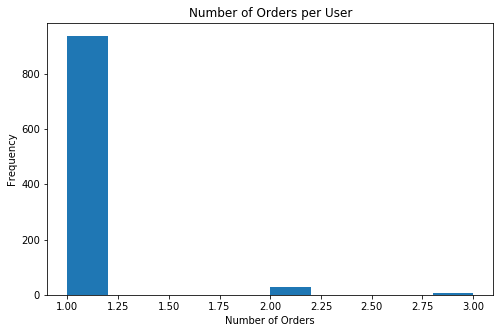

In [40]:
plt.figure(figsize=(8,5));
plt.hist(ordersByUsers['orders']);
plt.title('Number of Orders per User');
plt.xlabel('Number of Orders');
plt.ylabel('Frequency');

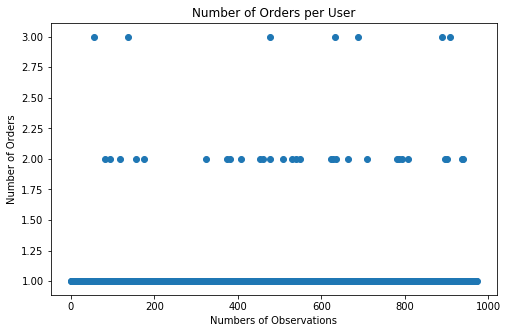

In [41]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8,5));
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Number of Orders per User');
plt.xlabel('Numbers of Observations');
plt.ylabel('Number of Orders');

- From the hist and the scatterplot above we can see that most of the users have and average order of 1 except for some users that have 2 or 3 orders.
- The number of orders per user doesn't have any huge outlier as the maximum it gets is 3 order per user.
- We can say that there is no outliers in our data and we can work with the full data if we want or fpr more accuracy we can try to find a limit that defines the outliers and to do so we will calculate the percentiles from 95 to 99

### Percentiles for the Number of Orders per User

In [42]:
np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99])

array([1., 1., 2., 2., 2.])

We can see that 97% of our data are smaller than 2 therefore we can set 2 orders per user as the lower limit for the number of orders to filter anomalies on that basis and with this we will filter out around 3-4% of our data.

### Order Prices

Now lets study and find out the limits that define the ouliers and anomalies for the orders' prices

In [43]:
orders_clean['revenue'].sort_values(ascending=False).head(10)

425     19920.4
1196     3120.1
1136     1425.8
744      1335.6
743      1050.0
1103     1025.8
1099     1015.9
949       930.0
940       905.8
613       830.3
Name: revenue, dtype: float64

we see that we have an order's price that reached around 20000 USD and the second highest is around 3000 USD and next is less than half so we have some cleaning to do therefore we will plot a hist and a scatter plot

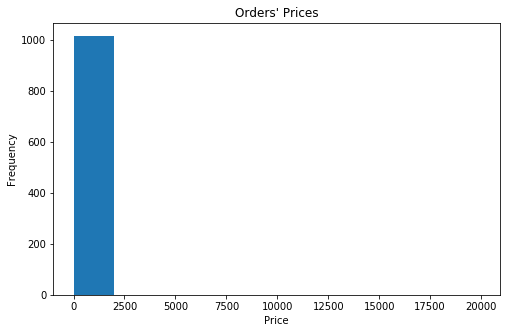

In [44]:
plt.figure(figsize=(8,5));
plt.hist(orders_clean['revenue']);
plt.title("Orders' Prices");
plt.xlabel('Price');
plt.ylabel('Frequency');

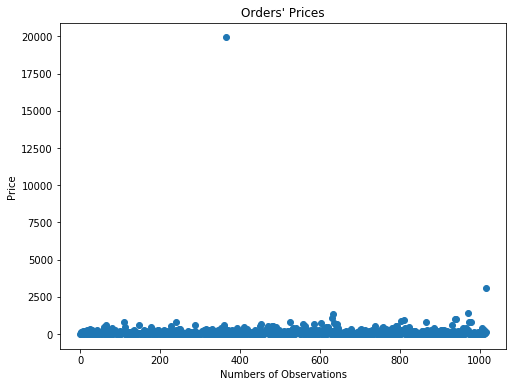

In [45]:
plt.figure(figsize=(8,6))
x_values = pd.Series(range(0, len(orders_clean['revenue'])))
plt.scatter(x_values, orders_clean['revenue']);
plt.title("Orders' Prices");
plt.xlabel('Numbers of Observations');
plt.ylabel('Price');

From the graphs above we cann see that we have some outliers but it is hard to define from this scatterplot so we will zoom in and scale our plot to make it clearer and easier

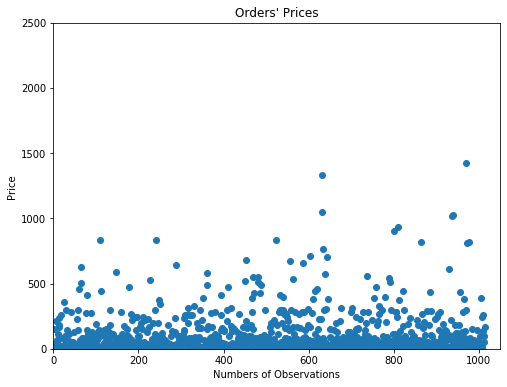

In [46]:
plt.figure(figsize=(8,6))
x_values = pd.Series(range(0, len(orders_clean['revenue'])));
plt.scatter(x_values, orders_clean['revenue']);
plt.title("Orders' Prices");
plt.xlabel('Numbers of Observations');
plt.ylabel('Price');
plt.axis([0, 1050, 0, 2500]);

- From this graph we can see that we have some slightly big orders and we can set the limit for abnormal orders between 500 and 1500 USD
- We will calculate the percentiles from 95 to 99 to help us make a more accurate decision in defining the limit of the anomalies

### Percentiles of Order Prices

In [47]:
np.percentile(orders_clean['revenue'], [95, 96, 97, 98, 99])

array([414.275, 475.5  , 538.14 , 654.56 , 830.3  ])

We can see that 97% of our data are less than 538 USD therefore we can set 500 USD as the lower limit for the orders' prices to filter anomalies on that basis and with this we will filter out around 3-4% of our data.

## Statistical Significance

Now lets calculate the Statistical Significance for the raw and filtered data and try to make a final decision for our test

### Raw Data

#### Statistical Significance of the Difference in Conversion (Raw Data)

In [48]:
orders.head(3)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


In [49]:
ordersByUsersA = orders_clean[orders_clean['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders_clean[orders_clean['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

ordersByUsersA.head()

,visitorid,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [50]:
ordersByUsersB.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [51]:
visits.head(3)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [52]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index = np.arange(visits[visits['group']=='A']['visits'].sum() - \
                                                    len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - \
                                                  len(ordersByUsersB['orders'])), name='orders')],axis=0) 

We will now conduct Mann-Whitney Test with the following hypothesis:  

- H0: Conversion rates for both groups are equal.
- H1: Conversion rates for both groups have statistically significant differences.

we will take alpha = 0.05

In [53]:
print('P-Value =' , "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative difference in conversion =',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-Value = 0.006
Relative difference in conversion = 0.160


- We see that the P-value is lower than 5% and is even lower than 1% so we can clearly reject the null hypthesis and say that the raw data analysis showed that the groups' conversion rates have statistically significant differences.  
- the relative conversion gain for group B compared with group A is 16%

#### Statistical Significance of the Difference in Average Order Size (Raw Data)

We will now conduct Mann-Whitney Test with the following hypothesis:  

- H0: Average order size for both groups are equal.
- H1: Average order size for both groups have statistically significant differences.

we will take alpha = 0.05

In [54]:
print('P-Value =' ,'{0:.3f}'.format(st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])[1]))
print('Relative difference in average order size =','{0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1))

P-Value = 0.431
Relative difference in average order size = 0.278


- The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 
- Nonetheless, the relative gain in average order size for group B compared with group A is 27% which means that the average order size for group B is much larger than it is for group A 

### Filtered Data

Now lets filter out our data using the limits we sefined earlier.  
We will filter out users who place more 2 or more orders or one order bigger than 500 USD.

In [55]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorid'],
                                 ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders_clean[orders_clean['revenue'] > 500]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorid, dtype: int64

(72,)


We see that we have 72 anomalous users in total.

#### Statistical Significance of the Difference in Conversion (Filtered Data)  

We will now repeat the Mann-Whitney Test with the same hypothesis:  

- H0: Conversion rates for both groups are equal.
- H1: Conversion rates for both groups have statistically significant differences.

we will take alpha = 0.05

In [56]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() -\
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() -\
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [57]:
print('P-Value =' ,"{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative difference in conversion =',"{0:.5f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-Value = 0.00483
Relative difference in conversion = 0.18627


Even after filtering out the anomalous users the ressults for conversion didn't change but the relative conversion gain for group B compared with group A has increased to 18.6%

#### Statistical Significance of the Difference in Average Order Size (Filtered Data)

We will repeat Mann-Whitney Test with the following hypothesis:  

- H0: Average order size for both groups are equal.
- H1: Average order size for both groups have statistically significant differences.

we will take alpha = 0.05

In [58]:
print('P-Value =' ,'{0:.5f}'.format(st.mannwhitneyu(
    orders_clean[np.logical_and(
        orders_clean['group']=='A',
        np.logical_not(orders_clean['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders_clean[np.logical_and(
        orders_clean['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('Relative difference in average order size =','{0:.5f}'.format(
    orders_clean[np.logical_and(orders_clean['group']=='B',np.logical_not(orders_clean['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_clean[np.logical_and(
        orders_clean['group']=='A',
        np.logical_not(orders_clean['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-Value = 0.49590
Relative difference in average order size = 0.01554


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


also in the case of the average order size we see that the P-value has increased and there's still no reason to reject the null hypothesis and conclude that average order size differs between the groups, but the relative difference has decreased significantly to 1.5% which means that both groups have almost the same average order size

### Make a Decision Based on the Test Results

To make our final conclusion we will first recap our facts:

- Both raw and filtered data revealed that there are statistically significant differences in conversion between the groups and that group B has more than 16% relative conversion gain compared to group A
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
- The graph showing the difference in conversion between the groups tells us that group B's results are better and now are 16% higher than group A's
- The graph of the difference in average purchase size shows fluctuations.  

**Final Conclusion**  
even though there was no statistically significant differences in average order size but the fact that the conversion in group B has stabilized around 16 - 18% higher than in group A allows to call the test a success as we managed to improve one of the most important metrics  
***Stop the test, it was a success.***